In [125]:
import numpy as np

In [157]:
X1 = np.random.randn(1000).reshape(1000, 1)
X2 = np.random.randn(1000).reshape(1000, 1)
X3 = np.random.randn(1000).reshape(1000, 1)
X = np.c_[X1, X2, X3]

In [158]:
Y = 5 * X1 + 3 * X2 + 1.5 * X3 + 6

In [159]:
W = np.zeros(4).reshape(4, 1)

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [162]:
def loss(y_true, y_pred):
    return 1 / (2*len(y_true)) * np.sum(np.sum((y_true-y_pred)**2))

In [163]:
def Gradient_Descent(W, b, Y, X, num_iterations = 1000, alpha = 0.001):
    m = len(Y)
    costs = []
    for i in range(num_iterations):
        y_hat = X.dot(W) + b
        Dweight = 1/m *  np.sum(X * (y_hat - Y))
        Dbias = 1/m * np.sum(y_hat - Y)
        W = W - alpha * Dweight
        b = b - alpha * Dbias
        costs.append(loss(y_pred=y_hat, y_true=Y))
    return W, b, costs

In [164]:
W = np.random.rand(3, 1)
b = np.random.rand(1)

In [165]:
W, b , cost= Gradient_Descent(W, b, y_train, X_train)

In [166]:
W, b

(array([[3.46270474],
        [2.90437903],
        [3.0347858 ]]),
 array([3.99559757]))

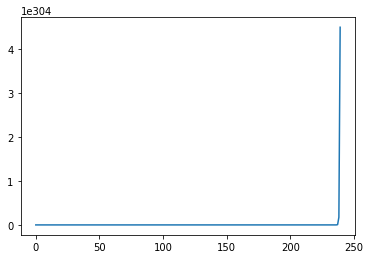

In [167]:
import matplotlib.pyplot as plt
plt.plot(costs)

In [168]:
from sklearn.metrics import mean_squared_error

In [169]:
mean_squared_error(y_true=y_test, y_pred=X_test.dot(W) + b)

9.659372398270914

In [170]:
import pandas as pd
from sklearn.datasets import load_boston

In [171]:
boston = load_boston()

/home/youseef/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [172]:
X = boston.data
Y = boston.target.reshape(506,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [173]:
W = np.random.randn(13).reshape(13, 1)
b = np.random.randn(1)

In [174]:
W, b ,cost= Gradient_Descent(W, b, Y = y_train, X = X_train)

/tmp/ipykernel_3684/4229274106.py:2: RuntimeWarning: overflow encountered in square
  return 1 / (2*len(y_true)) * np.sum(np.sum((y_true-y_pred)**2))
/tmp/ipykernel_3684/1705961779.py:6: RuntimeWarning: overflow encountered in multiply
  Dweight = 1/m *  np.sum(X * (y_hat - Y))
/home/youseef/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [175]:
from sklearn.preprocessing import StandardScaler

In [176]:
scaler = StandardScaler()
scaler2 = StandardScaler()

In [177]:
X = scaler.fit_transform(X)
Y = scaler2.fit_transform(Y)

In [178]:
W2 = np.random.randn(13, 1)
b2 = np.random.randn(1)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [184]:
W2, b2, costs = Gradient_Descent(W2, b2, y_test, X_test, num_iterations=1000, alpha=0.001)

In [185]:
mean_squared_error(y_pred=scaler2.transform(X.dot(W2) + b2), y_true=scaler2.transform(Y))

0.09588153578067617

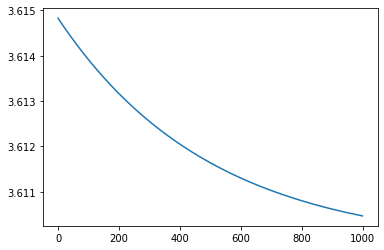

In [186]:
plt.plot(costs)